In [11]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#read csv file
df = pd.read_csv('diabetes.csv')

In [10]:
#prints the first 5 line from the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#prints information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#describes the numerical values in the dataframes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
#prints the datatypes of the columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
#checking the null values in the dataset
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
#renaming the column for better readability
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


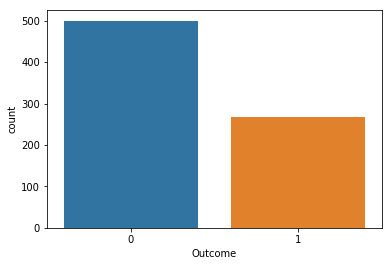

In [19]:
#countplot to count the values in outcome column
sns.countplot('Outcome',data=df)

In [20]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
# copying the dataframe to anotherdataframe
df1 = df.copy(deep=True)

In [22]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)


In [26]:
# checking null values
df1.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

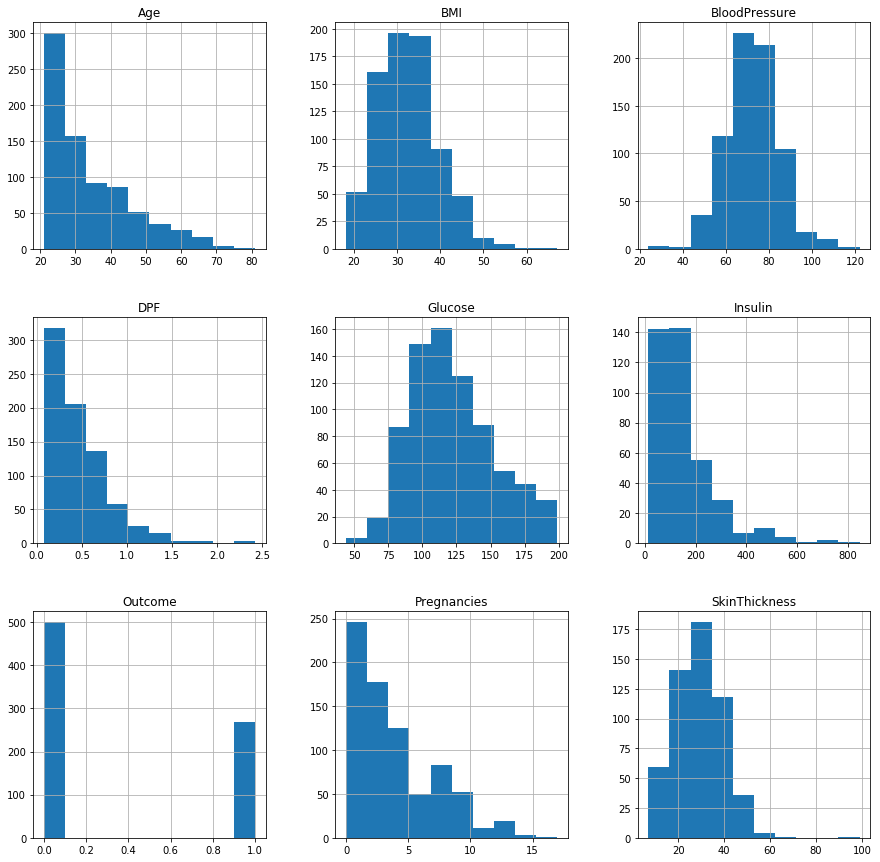

In [30]:
# to fill the null values we first have to understand the data by visualizing it
plot = df1.hist(figsize=(15,15))

In [32]:
# replacing null valuesby mean, median depending upon the distribution
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(),inplace=True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(),inplace=True)
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df1['BMI'].fillna(df1['BMI'].median(),inplace=True)

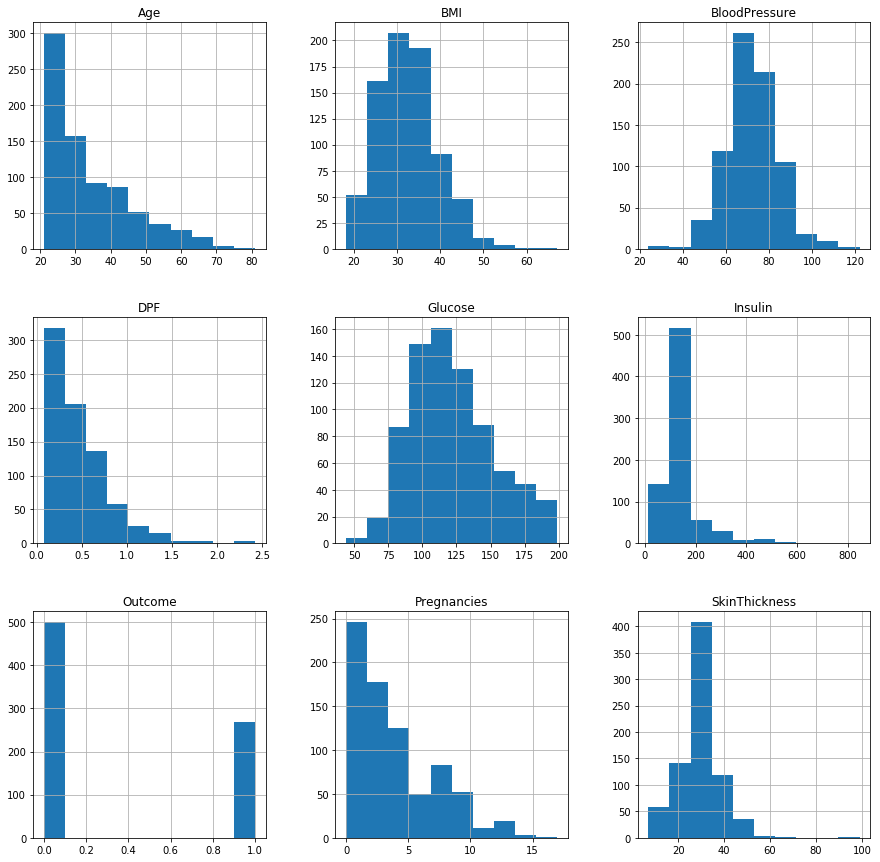

In [33]:
# plotting data after removing null values
plot = df1.hist(figsize=(15,15))

In [34]:
# verifying the null values
df1.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [43]:
# model building
from sklearn.model_selection import train_test_split

In [46]:
# defining the training and test set
X = df1.drop('Outcome',axis=1)
y = df1['Outcome']

In [47]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train size = {}, X_test size = {}'.format(X_train.shape,X_test.shape))

X_train size = (614, 8), X_test size = (154, 8)


In [48]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [75]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'knn': {
            'model': KNeighborsClassifier(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.780488
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.752846
2,random_forest,{'n_estimators': 200},0.775610
3,knn,{'n_neighbors': 20},0.757724
4,svm,"{'C': 10, 'kernel': 'linear'}",0.786992


In [57]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
score = cross_val_score(SVC(C=10,kernel='linear'),X_train,y_train,cv=5)
print('Average accuracy : {}%'.format(round(sum(score)*100/len(score)), 3))

Average accuracy : 76.0%


In [58]:
# creating svm model
model = SVC(C=10,kernel='linear')
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
# evaluate model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred = model.predict(X_test)
print('Confusion Matrix:\n {}'.format(confusion_matrix(y_test,pred)))

Confusion Matrix:
 [[82 17]
 [20 35]]


In [67]:
# accuracy score
print('Accuracy:\n {}%'.format(round(accuracy_score(y_test,pred)*100),4))

Accuracy:
 76.0%


In [68]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return model.predict(x)

In [69]:
predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

0

In [70]:
predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]

0

In [71]:
predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]

0

In [79]:
df1.iloc[0]

Pregnancies        6.000
Glucose          148.000
BloodPressure     72.000
SkinThickness     35.000
Insulin          125.000
BMI               33.600
DPF                0.627
Age               50.000
Outcome            1.000
Name: 0, dtype: float64

In [89]:
predict_diabetes(6,120,72,35,125,33.6,0.627,50)[0]

1